1. This is a more complex and functional system to analyze the performance of Reinforcement Learning.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get the whole data set
df = pd.read_csv('weatherAUS.csv')
data_collection = np.array(df)
print(data_collection)
print(len(data_collection))

[['2008-12-01' 'Albury' 13.4 ... 21.8 'No' 'No']
 ['2008-12-02' 'Albury' 7.4 ... 24.3 'No' 'No']
 ['2008-12-03' 'Albury' 12.9 ... 23.2 'No' 'No']
 ...
 ['2017-06-23' 'Uluru' 5.4 ... 26.1 'No' 'No']
 ['2017-06-24' 'Uluru' 7.8 ... 26.0 'No' 'No']
 ['2017-06-25' 'Uluru' 14.9 ... 20.9 'No' nan]]
145460


2. Extract target data from the Data set - data_collection

In [13]:
# set up environment and select the area
def environment_select_and_setup(data_set, start, duration, location):
    data, index = [], None
    for i in range(len(data_set)):
        d = data_set[i]
        if d[0] == start and d[1] == location:
            index = i
            break
    if index == None:
        print('Start date or location is invalid.')
    elif index + duration > len(data_set):
        print('Input time range out of scope.')
    else:
        data = data_collection[index:index + duration]
    return data


# Test with '2009-01-01', 'Albury', 2000 days,
data = environment_select_and_setup(data_collection, '2009-01-01', 2000, 'Albury')
data2 = environment_select_and_setup(data_collection, '2009-01-01', 2000, 'Cairns')
print(data)

[['2009-01-01' 'Albury' 11.3 ... 25.7 'No' 'No']
 ['2009-01-02' 'Albury' 9.6 ... 22.1 'No' 'No']
 ['2009-01-03' 'Albury' 10.5 ... 26.5 'No' 'No']
 ...
 ['2014-09-18' 'Albury' 3.8 ... 13.6 'No' 'No']
 ['2014-09-19' 'Albury' 1.1 ... 15.5 'No' 'No']
 ['2014-09-20' 'Albury' 2.9 ... 18.1 'No' 'No']]


3. Visualize the water system and wind system.

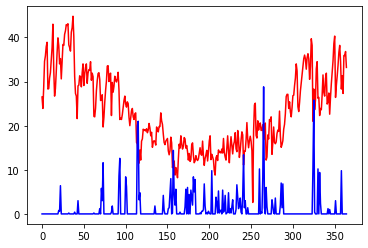

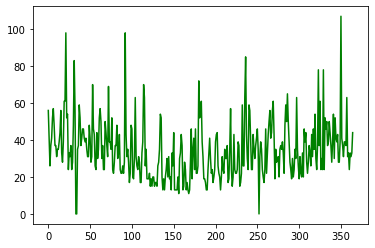

1.3041095890410952
water over 20 days: 4
water over 10 days: 11
water over 0 days: 111


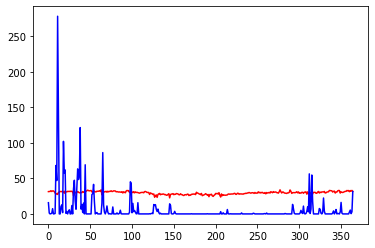

1.3041095890410952
water over 20 days: 25
water over 10 days: 48
water over 0 days: 137
[15.8, 1.2, 0.0, 0.4, 0.8, 7.4, 0.0, 0.2, 0.6, 68.2, 47.0, 278.4, 140.2, 0.0, 0.0, 10.4, 12.8, 1.8, 102.2, 57.8, 62.0, 0.8, 3.4, 0.0, 3.8, 5.8, 0.0, 0.0, 11.8, 0.0, 35.2, 47.4, 18.2, 6.6, 37.2, 63.4, 48.4, 53.2, 121.6, 6.8, 13.2, 2.0, 15.2, 0.0, 69.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 27.4, 28.4, 41.6, 17.0, 0.0, 1.2, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.2, 86.4, 12.4, 2.6, 0.0, 3.4, 11.2, 2.8, 0.0, 0.4, 0.0, 0.0, 0.0, 9.8, 0.0, 0.0, 0.0, 0.0, 1.4, 0.0, 0.0, 1.0, 5.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.4, 45.2, 43.2]


In [14]:
# Currently extract the water, wind, temp and rain prediction to perform on the system.

# water: 4, wind: 8, temp: 3, water_predict: 22

def data_format(data):
    system = {}
    Water_v, Wind_v, temp_v, water_predict = [], [], [], []
    for d in data:
        # data format
        if str(d[4]) == 'nan':
            rainfall = 0.0
        else:
            rainfall = d[4]
        if str(d[8]) == 'nan':
            wind = 0.0
        else:
            wind = d[8]
        if str(d[3]) == 'nan' and str(d[2]) == 'nan':
            temp = 0.0
        elif str(d[3]) == 'nan' and str(d[2]) != 'nan':
            temp = d[2]
        else:
            temp = d[3]
        water_p = d[22]
        
        system[d[0]] = [rainfall, wind, temp, water_p]
        Water_v.append(rainfall)
        Wind_v.append(wind)
        temp_v.append(temp)
        water_predict.append(water_p)
    return system, Water_v, Wind_v, temp_v, water_predict

system, Water_v, Wind_v, temp_v, water_predict = data_format(data)
sys2, Water2, Wind2, temp2, water_pre2 = data_format(data2)
    
# print(temp_v)
# print(Water_v)
plt.plot(temp_v[:365], color = 'r', linestyle = '-')
plt.plot([x for x in range(365)], Water_v[:365], color = 'b', linestyle = '-')
plt.show()
plt.plot(Wind_v[:365], color = 'g', linestyle = '-')
plt.show()

avg_water = sum(Water_v[:365]) / 365
print(avg_water)
print('water over 20 days: ' + str(len([x for x in Water_v[:365] if x >= 20])))
print('water over 10 days: ' + str(len([x for x in Water_v[:365] if x >= 10])))
print('water over 0 days: ' + str(len([x for x in Water_v[:365] if x > 0])))

plt.plot(temp2[:365], color = 'r', linestyle = '-')
plt.plot([x for x in range(365)], Water2[:365], color = 'b', linestyle = '-')
plt.show()

avg_water = sum(Water_v[:365]) / 365
print(avg_water)
print('water over 20 days: ' + str(len([x for x in Water2[:365] if x >= 20])))
print('water over 10 days: ' + str(len([x for x in Water2[:365] if x >= 10])))
print('water over 0 days: ' + str(len([x for x in Water2[:365] if x > 0])))
print(Water2[:100])

4. Define the Plants base on the environment

In [15]:
class Plant():
    def __init__(self, id):
        self.id = id
        # threshold: water maximum per day
        # period: the reward return time
        # water: the water required o.w. fail to plant -> reward = -200
        if id == 1:
            # 5 / 3.
            self.name = 'Plant 1'
            self.threshold = 100 # daily water collect can't over this number
            self.period = 14
            self.reward = 20
            self.co_reward = 4
            self.water = 0
            self.curr = 1
            self.temp_threshod = 40
            self.water_collect = 0.0
        elif id == 2:
            # 7.5 / 2.5
            self.name = 'Plant 2'
            self.threshold = 50
            self.period = 21
            self.reward = 50
            self.co_reward = 3
            self.water = 3
            self.curr = 1
            self.temp_threshod = 37
            self.water_collect = 0.0
        elif id == 3:
            # 8 / 4
            self.name = 'Plant 3'
            self.threshold = 50
            self.period = 25
            self.reward = 100
            self.co_reward = 3.4
            self.water = 10
            self.curr = 1
            self.temp_threshod = 37
            self.water_collect = 0.0
        elif id == 4:
            # 25 / 5
            self.name = 'Plant 4'
            self.threshold = 50
            self.period = 30
            self.reward = 300
            self.co_reward = 2
            self.water = 40
            self.curr = 1
            self.temp_threshod = 35
            self.water_collect = 0.0

5. Define the action list and q values

In [16]:
# find the maximum q values from the q_values list. --helper function for epsilonGreedyAgent
def argmax(q_values):
    
    top_value = float("-inf")
    ties = []
    
    for i in range(len(q_values)):
        # find the maximum q values
        if q_values[i] > top_value:
            top_value = q_values[i]
            ties = [i]
        elif q_values[i] == top_value:
            ties.append(i)
    return np.random.choice(ties)

# Epsilon Greedy to try new actions or argmax value.
def EpsilonGreedyAgent(q_values, epsilon):
    r = np.random.random()
    if r < epsilon:
        current_action = np.random.randint(0, len(q_values))
    else:
        current_action = argmax(q_values)
    return current_action

# Update the Q value list from last action.
def UpdateQvalues(q_values, a_record, last_action, reward):
    a_record[last_action] += 1
    q_values[last_action] = q_values[last_action] + 1 / a_record[last_action] \
    * (reward - q_values[last_action])
    


In [17]:
# define action lists - may have more
# 1: plant crop 1
# 2: plant crop 2
# 3: plant crop 3
# 4: plant crop 4

actions = ['plant-1', 'plant-2', 'plant-3', 'plant-4']
q_values = [0, 0, 0, 0]
a_record = [0, 0, 0, 0]

In [18]:
def checkMature(farmland, q_values, a_record):
    reward = 0
    # print("Check Mature or not")
    found = True
    while found:
        # find mature
        found = False
        for i in range(len(farmland)):
            
            x = farmland[i]
            # mature now
            if x.curr == x.period:
                # flag true
                found = True
                # check water collected
                
                if x.water_collect < x.water:
                    reward = x.period * x.co_reward
                    UpdateQvalues(q_values, a_record, x.id - 1, reward)
                # update q values
                else:
                    reward = x.reward + x.period * x.co_reward
                    UpdateQvalues(q_values, a_record, x.id - 1, reward)
                # clean that plant
                farmland.pop(i)
                break
    return reward

In [19]:
def action_flow(date, farmland, a_record, q_values, rain, temp, epsilon):
    # check mature or not
    reward = checkMature(farmland, q_values, a_record)
    
    # check farming full
    farming(farmland, q_values, epsilon)
    
   # UIupdate()

    reward = end_day_checking(farmland, rain[date], q_values, a_record, epsilon)
    
    # UI hold on time
    # time.sleep(1)
    return reward
    
def farming(farmland, q_values, e):
    # return the id of the crops to plant
    ret = []
    while (len(farmland) < 3):
        r = EpsilonGreedyAgent(q_values, e)
        print("The agent select the plant " + str(r + 1))
        ret.append(r + 1)
        farmland.append(Plant(r + 1))
    return ret
        
def end_day_checking(farmland, rain, q_values, a_record, e):
    reward = 0
    # check each farmland
    tp = 3
    index = 0
    log = []
    while index < tp:
        f = farmland[index]
        found = False
        if rain > f.threshold:
            # update q values -------------------   -
            reward = -50
            UpdateQvalues(q_values, a_record, f.id - 1, reward)
            farmland.pop(index)
            print('Farmland ' + str(index + 1) + ' is damaged.')
            found = True
        else:
            # days increase & collect water
            f.curr += 1
            f.water_collect += rain
            print('Farmland ' + str(index + 1) + ' is good.')
            
        
        # check done or not
        if found:
            tp -= 1
        else:
            index += 1
            
    farming(farmland, q_values, e)

    return reward


In [20]:
# # data or data2
# date = 0
# farmland = []
# total_reward = 0
# while(date < len(data2)):
# # while (date < 10):
#     print(date)
#     total_reward += action_flow(date, farmland, actions, a_record, q_values, Water2)
#     date += 1
#     print(total_reward, q_values, a_record)
#     print('-----------------------------------------')

In [21]:
from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import time
import sys

class BackendThread(QObject):
    # 通过类成员对象定义信号
    update_date = pyqtSignal(str)
    update_farm_1 = pyqtSignal(str)
    update_farm_2 = pyqtSignal(str)
    update_farm_3 = pyqtSignal(str)
    update_q_values = pyqtSignal(str)
    update_reward = pyqtSignal(str)
    farming = []
    q_values = []
    reward = 0
    date = 0
    
    # 处理业务逻辑
    def run(self):
        while self.date < 200:
            t_reward, self.q_values = action_flow(date, farming, actions, a_record, q_values, Water2)
            self.reward += t_reward
            self.update_date.emit(str(self.date))
            self.update_farm_1.emit(str(self.date))
            self.update_farm_2.emit(str(self.farming[1].id))
            self.update_farm_3.emit(str(self.farming[2].id))
            self.update_q_values.emit(str(self.q_values))
            self.update_reward.emit(str(reward))
            time.sleep(1)
            self.date += 1

class Window(QDialog):
    def __init__(self):
        QDialog.__init__(self)
        self.setWindowTitle('Senario Simulation')
        self.resize(400, 300)
        self.basicUI()
        self.date = QLabel('0', self)
        #self.date = QLabel('2000', self)
        self.date.move(0, 250)
#         self.farm1 = QLabel('0', self)
#         self.farm1.move(70, 60)
#         self.farm2 = QLabel('0', self)
#         self.farm2.move(120, 60)
#         self.farm3 = QLabel('0', self)
#         self.farm3.move(170, 60)
        self.ql = QLabel('Q values', self)
        self.ql.move(30, 180)
        self.qs = QLabel('[0000, 0000, 0000, 0000]', self)
        self.qs.move(30, 200)
        self.re = QLabel('0', self)
        self.re.move(320, 200)
        self.initUI()

    def basicUI(self):
        lbl1 = QLabel('Crop-1', self)
        lbl1.move(50, 20)
        lbl2 = QLabel('Crop-2', self)
        lbl2.move(100, 20)
        lbl3 = QLabel('Crop-3', self)
        lbl3.move(150, 20)
        lbl4 = QLabel('Crop-4', self)
        lbl4.move(200, 20)
        lbl5 = QLabel('Weather', self)
        lbl5.move(300, 20)
        lbl6 = QLabel('FarmLand-1', self)
        lbl6.move(50, 100)
        lbl7 = QLabel('FarmLand-2', self)
        lbl7.move(150, 100)
        lbl8 = QLabel('FarmLand-3', self)
        lbl8.move(250, 100)
        lbl9 = QLabel('Rewards: ', self)
        lbl9.move(250, 200)
    
    def paintEvent(self, e):
        qp = QPainter()
        qp.begin(self)
        self.drawCrops(qp)
        qp.end()
    
    def drawCrops(self, qp):
        col = QColor(0, 0, 0)
        qp.setPen(col)

        qp.setBrush(QColor(225, 83, 96))
        qp.drawRect(60, 50, 20, 20)
        
        qp.setBrush(QColor(57, 187, 152))
        qp.drawRect(110, 50, 20, 20)
        
        qp.setBrush(QColor(255, 200, 0))
        qp.drawRect(160, 50, 20, 20)
        
        qp.setBrush(QColor(250, 101, 1))
        qp.drawRect(210, 50, 20, 20)
        
        qp.setBrush(QColor(255, 255, 255))
        qp.drawRect(300, 40, 40, 40)
        
        qp.drawRect(70, 120, 40, 40)
        qp.drawRect(170, 120, 40, 40)
        qp.drawRect(270, 120, 40, 40)
        
        
    def initUI(self):
        # 创建线程
        self.backend = BackendThread()
        # 连接信号
        self.backend.update_date.connect(self.handleDisplay)
        self.backend.update_farm_1.connect(self.handleDisplay)
        self.thread = QThread()
        self.backend.moveToThread(self.thread)
        # 开始线程
        self.thread.started.connect(self.backend.run)
        self.thread.start()
        

    # 将当前时间输出到文本框
    def handleDisplay(self, data):
        self.date.setText(data)



In [22]:
app = QApplication(sys.argv)
win = Window()
win.show() 
sys.exit(app.exec_())

NameError: name 'date' is not defined

SystemExit: 0

C:\Users\YuexinChen\anaconda3\envs\NLP\lib\site-packages\IPython\core\interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
